<a href="https://colab.research.google.com/github/nabilaelloumi/hello-word/blob/master/Copie_de_Nouvel_%C3%A9diteur_de_code_de_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nouvel éditeur de code de Colaboratory

Un nouvel éditeur de code est disponible pour Colaboratory. Il offre les fonctionnalités suivantes :
* Meilleures suggestions
* Nouveaux raccourcis clavier
* Meilleure accessibilité

In [0]:
from google.colab import files
files.upload()
code


Saving PANCREAS_0001.nii.gz to PANCREAS_0001.nii.gz


In [0]:
from google.colab import files
files.upload()




Spectral clustering: kmeans, 4.82s
Spectral clustering: discretize, 4.54s


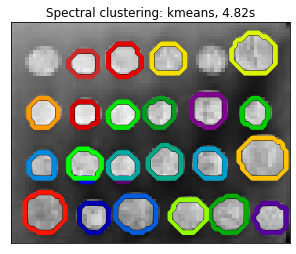

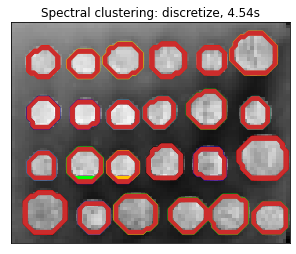

In [0]:
print()

# Author: Gael Varoquaux <gael.varoquaux@normalesup.org>, Brian Cheung
# License: BSD 3 clause

import time

import numpy as np
from distutils.version import LooseVersion
from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt
import skimage
from skimage.data import coins
from skimage.transform import rescale

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

# these were introduced in skimage-0.14
if LooseVersion(skimage.__version__) >= '0.14':
    rescale_params = {'anti_aliasing': False, 'multichannel': False}
else:
    rescale_params = {}

# load the coins as a numpy array
orig_coins = coins()

# Resize it to 20% of the original size to speed up the processing
# Applying a Gaussian filter for smoothing prior to down-scaling
# reduces aliasing artifacts.
smoothened_coins = gaussian_filter(orig_coins, sigma=2)
rescaled_coins = rescale(smoothened_coins, 0.2, mode="reflect",
                         **rescale_params)

# Convert the image into a graph with the value of the gradient on the
# edges.
graph = image.img_to_graph(rescaled_coins)

# Take a decreasing function of the gradient: an exponential
# The smaller beta is, the more independent the segmentation is of the
# actual image. For beta=1, the segmentation is close to a voronoi
beta = 10
eps = 1e-6
graph.data = np.exp(-beta * graph.data / graph.data.std()) + eps

# Apply spectral clustering (this step goes much faster if you have pyamg
# installed)
N_REGIONS = 25

for assign_labels in ('kmeans', 'discretize'):
    t0 = time.time()
    labels = spectral_clustering(graph, n_clusters=N_REGIONS,
                                 assign_labels=assign_labels, random_state=42)
    t1 = time.time()
    labels = labels.reshape(rescaled_coins.shape)

    plt.figure(figsize=(5, 5))
    plt.imshow(rescaled_coins, cmap=plt.cm.gray)
    for l in range(N_REGIONS):
        plt.contour(labels == l,
                    colors=[plt.cm.nipy_spectral(l / float(N_REGIONS))])
    plt.xticks(())
    plt.yticks(())
    title = 'Spectral clustering: %s, %.2fs' % (assign_labels, (t1 - t0))
    print(title)
    plt.title(title)
plt.show()

## Activation et désactivation du nouvel éditeur

Le nouvel éditeur peut être contrôlé à l'aide du bouton "Test" qui s'affiche dans l'angle supérieur droit.

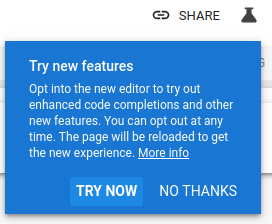
### Problèmes
Vous pouvez désactiver le nouvel éditeur si vous rencontrez des problèmes. Merci toutefois de nous indiquer pourquoi, afin que nous puissions les résoudre.

Vous pouvez signaler les bugs à l'adresse https://github.com/googlecolab/colabtools/issues/new ou utilisez l'option "Envoyez des commentaires…" dans le menu "Aide".

In [0]:
from google.colab import files
files.upload()



Saving alzheimers-dataset-4-class-of-images.zip to alzheimers-dataset-4-class-of-images.zip


# Suggestions de code automatiques

Les suggestions de code et les indices concernant la documentation apparaissent automatiquement lorsque vous saisissez du texte.

Utilisez les raccourcis clavier suivants :
 - <code>Ctrl+Espace</code> pour rouvrir les suggestions.
 - <code>Ctrl+Maj+Espace</code> pour rouvrir les indices concernant les paramètres.

![Suggestions améliorées](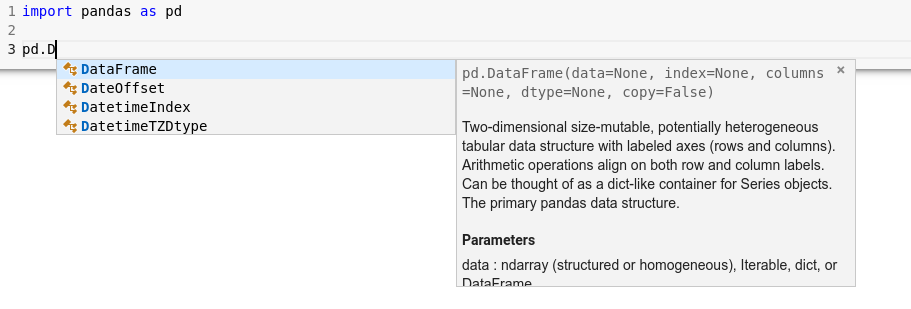
)




## Désactivation des suggestions de code automatiques

Les suggestions de code automatiques peuvent être désactivées dans les paramètres. Pour cela, désélectionnez l'option "Déclencher automatiquement les suggestions de code".

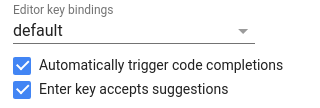

# Raccourcis clavier

Les raccourcis clavier par défaut de l'éditeur ont été mis à jour et de nouvelles combinaisons de touches sont disponibles :

* Vim
* Classique – Restaure certains raccourcis clavier courants de l'éditeur précédent.

Ces options sont disponibles dans les paramètres, dans la section "Raccourcis clavier de l'éditeur".

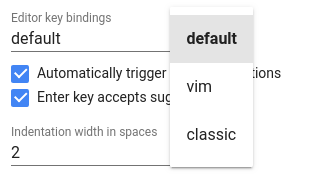

Lorsque les suggestions de code automatiques sont désactivées, utilisez les raccourcis clavier suivants :
 - <code>Tab</code> pour rouvrir les suggestions.
 - <code>Maj+Tab</code> pour rouvrir les indices concernant les paramètres.

# Meilleure mise en surbrillance de la syntaxe

Amélioration de la compatibilité avec les langues imbriquées :

```notebook-python
df = pd.io.gbq.read_gbq('''
  SELECT 
    REGEXP_EXTRACT(name, '[a-zA-Z]+'),
    SUM(number) as count
  FROM `bigquery-public-data.usa_names.usa_1910_2013`
  WHERE state = 'TX'
  GROUP BY name
  ORDER BY count DESC
  LIMIT 100
''')
```